In [1]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np

In [2]:
walk_times = 5000
number_of_steps = 1000
each_step = np.random.randint(0,2,size=(walk_times,number_of_steps))
each_step[each_step > 0] = 1
each_step[each_step == 0] = -1
walk_path = each_step.cumsum(axis=1)
print(walk_path)

[[  1   0  -1 ... -26 -25 -26]
 [  1   2   1 ...  12  13  12]
 [  1   2   3 ...   2   3   4]
 ...
 [ -1   0   1 ...  16  17  18]
 [  1   0  -1 ...  54  55  56]
 [  1   2   1 ... -32 -33 -34]]


In [3]:
max_distance = np.abs(walk_path).max() # 构建离出发点最远的距离
print('醉汉走出的最远距离:%d' % max_distance)

醉汉走出的最远距离:123


In [4]:
average_max_distance = np.abs(walk_path).max(axis=1).mean() # 求各次模拟中走出的最远距离的均值
print('醉汉走出的最远距离平均值为 : %.3f' % average_max_distance)

醉汉走出的最远距离平均值为 : 39.629


In [5]:
destination_distance = np.abs(walk_path[:,-1]).mean() # 求解最终位置的平均距离
print('醉汉最终位置距离出发点平均距离 : %.3f' % destination_distance)

醉汉最终位置距离出发点平均距离 : 25.710


In [6]:
# 对以下每一行，找到 True，即 1所在位置
time_to_10 = (np.abs(walk_path >= 10)).argmax(axis=1).mean() # 求解第一次到达距离原点10的平均时间
print('醉汉第一次到达距离出发点为10处花费的时间单位均值: %.3f' % time_to_10)

醉汉第一次到达距离出发点为10处花费的时间单位均值: 167.442


In [7]:
time_to_origin = np.where(walk_path == 0,1,0).sum(axis=1).mean() # 求解穿过出发点对平均次数
print('醉汉平均经过出发点的次数: %.3f' % time_to_origin)

醉汉平均经过出发点的次数: 24.313


In [8]:
# 求解改变方向的平均次数
change_count = []
for i in range(len(each_step)):
    singe_count = 0
    for j in range(1,len(each_step[i])):
        if each_step[i,j] == each_step[i,j-1]:
            singe_count += 1
    change_count.append(singe_count)
change_count = np.array(change_count)
change_count_average = change_count.mean()
print('醉汉平均改变方向的次数: %.3f' % change_count_average)

醉汉平均改变方向的次数: 499.957


In [9]:
# 求解5000次中，有多少次模拟，超过30的记录
hit_30 = (np.abs(walk_path) >= 30).any(1)
hit_30_count = hit_30.sum()
print(hit_30_count)
print('醉汉在 %d 次中到达过，距离出发点大于等于 30处' % hit_30_count)

3416
醉汉在 3416 次中到达过，距离出发点大于等于 30处


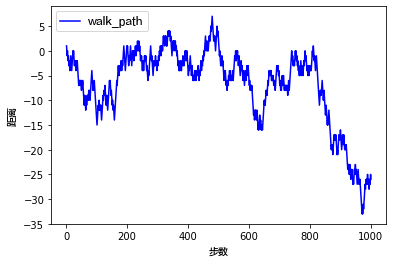

In [10]:
# 模拟第一个用户的行走路径
plt.figure(1)
font = FontProperties(fname='/Users/apple/Desktop/Lantinghei.ttc',size=10)
plt.plot(np.arange(1,1001,dtype=int),walk_path[0],color = 'blue',linestyle = '-',label = 'walk_path')
plt.legend(loc='upper left',prop=font)
plt.xlabel(u'步数',fontproperties = font)
plt.ylabel(u'距离',fontproperties = font)
plt.show()